In [5]:
from Bio import SeqIO

# Use the full path to the file
fasta_file = "C:/Users/sujit/OneDrive/Desktop/Domain/gene1.txt"

with open(fasta_file) as handle:
    for record in SeqIO.parse(handle, "fasta"):
        print("ID:", record.id)
        print("Description:", record.description)
        print("Sequence:", record.seq)
        print(len(record))

ID: HuFRS1
Description: HuFRS1
Sequence: ATGGAGAGGTTCATGTTCTCTACGCCCATGATCATTTCTCCGGAACCATATGAAGGTATGGAGTTTGATTCTGAGGAAGCTGCGAAGGAATTCTATAATGCATACGCTACTCAGATGGGTTTTAAAGCACGCATCAGTTCATTCATCCGTTCAAAGCGCGACAAAACAATAATTTCGAGGCAACTCGTATGCTCAAGAGAAGGATTTCGTTCTACAAAAGACGCAAGTATTGAAGGAAGAACTAAACGACCTAGAATGATCACCAGGGTGGGCTGCAGGGCTATGATAATGGTAAAGAAACAAAGTTCAGGGAAGTGGATTATTACAAAATGTGAAAAGATTCATAATCATGTTCTTGGGACACAAGGAAAAGTAGAGATGCTCGGCTATGATCCTTATTCATGCGAAGAGGAAAGAAATGGAAAAGATAAGCTTGGTGGAGCGGTAGGTAACGCACAAGAAATGCTAAGTGTTCTTCCTGAAGGGGAACCTGGCCTAGAACCACATGAGGGAATGGAGTTCGAGTCAGAACAAGAAGCGCAATTATTCTATAAAGAATATGCTAGGCGCGTGGGATTTAGGGCACGTGTGAGCTCGTACTATCGGTCAAAGCGGGATAACTCAATCATCTCTCGATTGATTGTATGTTCAAAAGAAGGATTCCGTGCAAAGAAAGATGAAAATGGTGAAGAGCTTCAAAGGCCTAGAGCCATTACTAGGGTTGGGTGTAAGGCGATGATTATGGTGAAAAAACGAGATTCCGGGAAATGGGTTGTTTCAAAGCTTGTCAAACACCATAATCATCAGCTAAAGCTGCCAGCATCATCTGATGATGATCATTCTAATGCCGAGGATGATGACATGATTGGGATAGAGAAGGTCTTAGGTGCTCAAGATGGTACTGGATTTATTGAGCCCTATGAGGGTTTGGAGTTTGAATCCGAGGAGGCTGCAAAGAT

In [2]:
pip install ete3


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from Bio import SeqIO
from Bio.Seq import Seq

# Read sequences from a FASTA file
sequences = []
with open("C:/Users/sujit/OneDrive/Desktop/Domain/gene1.txt") as fasta_file:
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequences.append(record.seq)

# Determine the maximum length among all sequences
max_length = max(len(seq) for seq in sequences)

# Pad shorter sequences with gaps ("-") to match the maximum length
padded_sequences = [str(seq).ljust(max_length, "-") for seq in sequences]

# Write the padded sequences to a new FASTA file
with open("C:/Users/sujit/OneDrive/Desktop/Domain/aligned1.txt", "w") as output_file:
    for i, seq in enumerate(padded_sequences, start=1):
        output_file.write(f">Sequence_{i}\n{seq}\n")

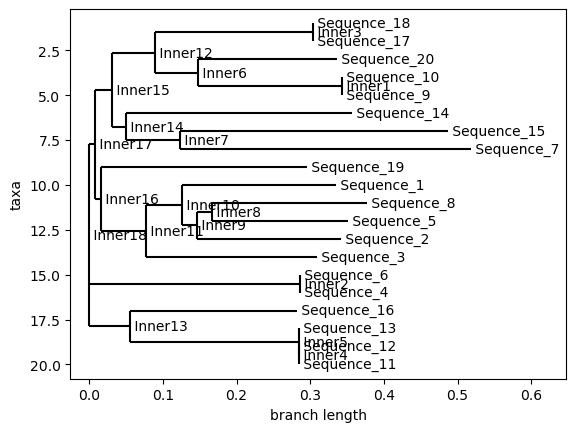

1

In [4]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
from Bio import AlignIO
import matplotlib.pyplot as plt
from ete3 import Tree, TreeStyle

# Load your sequences from a file
alignment = AlignIO.read("C:/Users/sujit/OneDrive/Desktop/Domain/aligned1.txt", "fasta")

# Calculate the distance matrix
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

# Construct the tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)
ts = TreeStyle()
ts.scale = 100

# Draw the tree (optional)
Phylo.draw(tree)

# Save the tree to a file
Phylo.write(tree, "output_tree.nwk", "newick")

Newick format:
((A:0.1,B:0.2):0.3,C:0.4);


Tree 1 file path: C:/Users/sujit/OneDrive/Desktop/Domain/output_tree.nwk
Tree 2 file path: C:/Users/sujit/OneDrive/Desktop/bd/output_tree1.nwk
Combined alignment:
Alignment with 20 rows and 21 columns
1-------------------2 Sequence_18
-1------------------2 Sequence_17
--1-----------------2 Sequence_20
---1----------------2 Sequence_10
----1---------------2 Sequence_9
-----1--------------2 Sequence_14
------1-------------2 Sequence_15
-------1------------2 Sequence_7
--------1-----------2 Sequence_19
---------1----------2 Sequence_1
----------1---------2 Sequence_8
-----------1--------2 Sequence_5
------------1-------2 Sequence_2
-------------1------2 Sequence_3
--------------1-----2 Sequence_6
---------------1----2 Sequence_4
----------------1---2 Sequence_16
-----------------1--2 Sequence_13
------------------1-2 Sequence_12
-------------------12 Sequence_11
New phylogenetic tree:


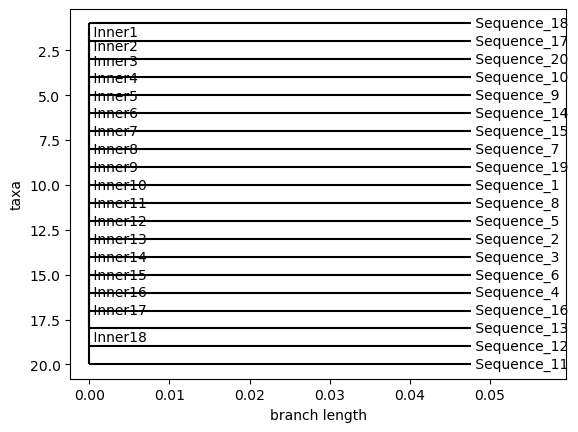

In [6]:
from Bio import Phylo
from Bio.Align import MultipleSeqAlignment
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

def combine_trees(tree1, tree2):
    # Print file paths for verification
    print("Tree 1 file path:", tree1)
    print("Tree 2 file path:", tree2)

    # Load the trees
    tree1 = Phylo.read(tree1, "newick")
    tree2 = Phylo.read(tree2, "newick")

    # Extract the species names from each tree
    species1 = [leaf.name for leaf in tree1.get_terminals()]
    species2 = [leaf.name for leaf in tree2.get_terminals()]

    # Find the common species between the two trees
    common_species = set(species1).intersection(species2)

    # Concatenate the species names
    combined_species = species1 + [species for species in species2 if species not in common_species]

    # Create an empty alignment
    alignment = MultipleSeqAlignment([])

    # Create a sequence record for each species
    for species in combined_species:
        # Initialize the sequence with gaps
        sequence = '-' * len(combined_species)
        
        # Update sequence with data from tree 1
        if species in species1:
            idx = species1.index(species)
            sequence = sequence[:idx] + '1' + sequence[idx+1:]

        # Update sequence with data from tree 2
        if species in species2:
            idx = species2.index(species)
            sequence = sequence[:idx+len(species1)] + '2' + sequence[idx+len(species1)+1:]

        # Create a sequence record and add it to the alignment
        record = SeqRecord(Seq(sequence), id=species)
        alignment.append(record)

    # Print the combined alignment
    print("Combined alignment:")
    print(alignment)

    # Calculate distance matrix
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    
    # Construct the tree from distance matrix
    constructor = DistanceTreeConstructor()
    new_tree = constructor.nj(dm)
    
    return new_tree

# Example usage
tree1_file = "C:/Users/sujit/OneDrive/Desktop/Domain/output_tree.nwk"
tree2_file = "C:/Users/sujit/OneDrive/Desktop/bd/output_tree1.nwk"
new_tree = combine_trees(tree1_file, tree2_file)

# Print the new tree
print("New phylogenetic tree:")
Phylo.draw(new_tree)
